In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
dfx = pd.read_csv("Diabetes_XTrain.csv")
print(dfx.shape)

(576, 8)


In [12]:
dfx.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [15]:
X = dfx.values

In [16]:
dfy = pd.read_csv("Diabetes_YTrain.csv")
print(dfy.shape)

(576, 1)


In [38]:
Y = dfy.values[:, 0]

In [40]:
dfx_test = pd.read_csv("Diabetes_Xtest.csv")

In [45]:
X_test = dfx_test.values
X_test.shape

(192, 8)

In [21]:
diabetes = pd.concat([dfx,dfy],axis=1)

In [25]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,168,88,42,321,38.2,0.787,40,1
1,8,110,76,0,0,27.8,0.237,58,0
2,7,147,76,0,0,39.4,0.257,43,1
3,2,100,66,20,90,32.9,0.867,28,1
4,4,129,86,20,270,35.1,0.231,23,0


In [39]:
print(X.shape, Y.shape)

(576, 8) (576,)


Outcome
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

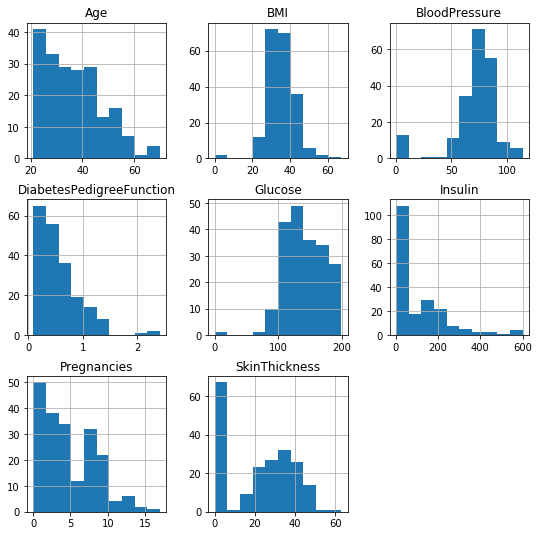

In [36]:
diabetes[diabetes.Outcome == 1].groupby('Outcome').hist(figsize=(9, 9))

In [87]:
def dist(x1, x2):
    return np.sqrt(sum((x1 - x2)**2))
def knn(X, Y, queryPoint, k=11):
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint, X[i])
        vals.append((d, Y[i]))
        
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    
#     print(vals)
    
    new_vals = np.unique(vals[:, 1], return_counts=True)
#     print(new_vals)
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [92]:
Outcome = []
for i in range(X_test.shape[0]):
    prediction = knn(X,Y,X_test[i])
    Outcome.append(int(prediction))

In [93]:
Outcome.insert(0,"Outcome")
print(Outcome)

['Outcome', 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0]


In [94]:
result = pd.DataFrame(Outcome)
result.to_csv('result.csv', index=False, header=False)